### Min Khant Soe
### Pyae Sone

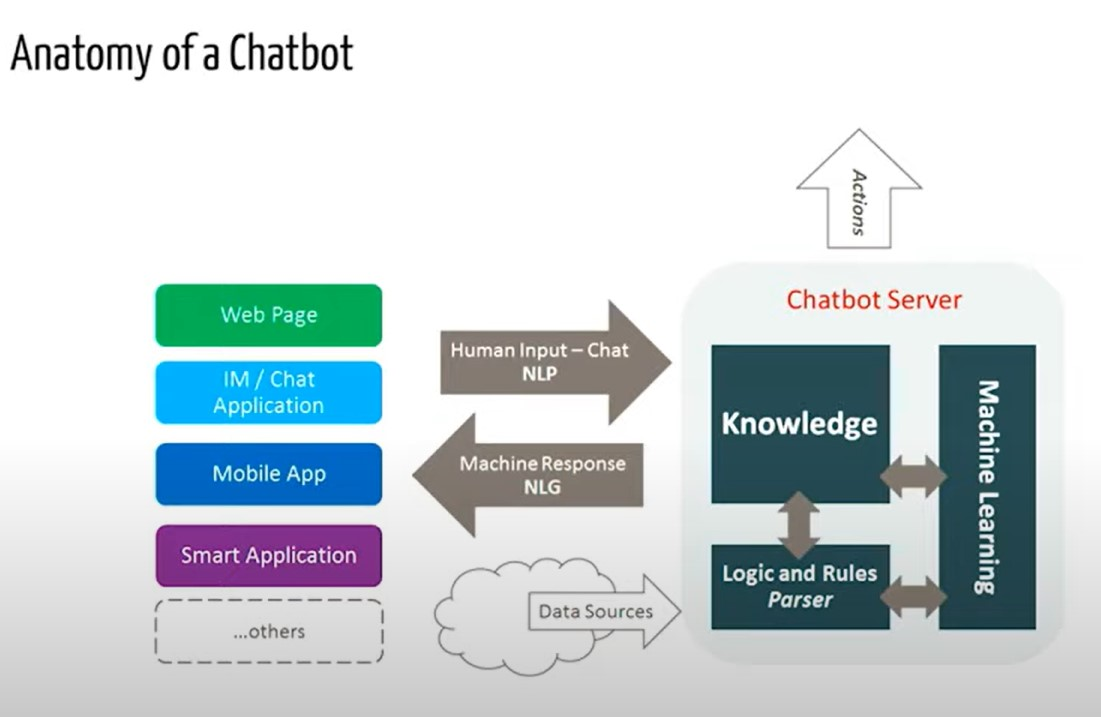

In [1]:
import nltk
import warnings
import numpy as np
import random
import string 

https://www.nltk.org/

https://github.com/nltk/nltk/wiki/Stanford-CoreNLP-API-in-NLTK

https://github.com/nltk/nltk/wiki

https://www.alibabacloud.com/blog/natural-language-processing-in-python-3-using-nltk_595031

Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.

In [2]:
warnings.filterwarnings("ignore")

Chatbot.txt file: https://github.com/abr-98/Chatbot

## Text Preporcessing

In [3]:
nltk.download('punkt') # Sentence Tokenizer
nltk.download('wordnet') # process that normalizes a word with context
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minkh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minkh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\minkh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
f = open('chatbot.txt', 'r', errors = 'ignore')
raw = f.read()
# print(raw)
raw = raw.lower() #Converting to lowercase
# print(raw)

### Segmentation

In [5]:
sentence_tokens = nltk.sent_tokenize(raw)
print("############ Example sentence token ############ \n")
print(sentence_tokens[0])
word_tokens = nltk.word_tokenize(raw)
print("\n############ Example Word token ############ \n")
print(word_tokens[:10])

############ Example sentence token ############ 

chatbot
from wikipedia, the free encyclopedia
jump to navigationjump to search
for other uses, see chatbot (disambiguation).

############ Example Word token ############ 

['chatbot', 'from', 'wikipedia', ',', 'the', 'free', 'encyclopedia', 'jump', 'to', 'navigationjump']


The Python ord() method converts a character into its Unicode code. The ord() method takes one argument: a string containing a single Unicode character. This method returns an integer that represents that character in Unicode.

https://careerkarma.com/blog/python-ord/#:~:text=The%20Python%20ord()%20method,represents%20that%20character%20in%20Unicode.

#### Noise Removal >> Remove redundant text components

In [6]:
reomve_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

#### Normalization of word with Lemmatization

In [7]:
lemmer = nltk.stem.WordNetLemmatizer()  #reduce the word to its lemma >> many same words to one word

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(reomve_punct_dict)))

#### Greeting 

In [8]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]

In [9]:
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

## Feature Engineering

### Frequency-Inverse Document Frequency

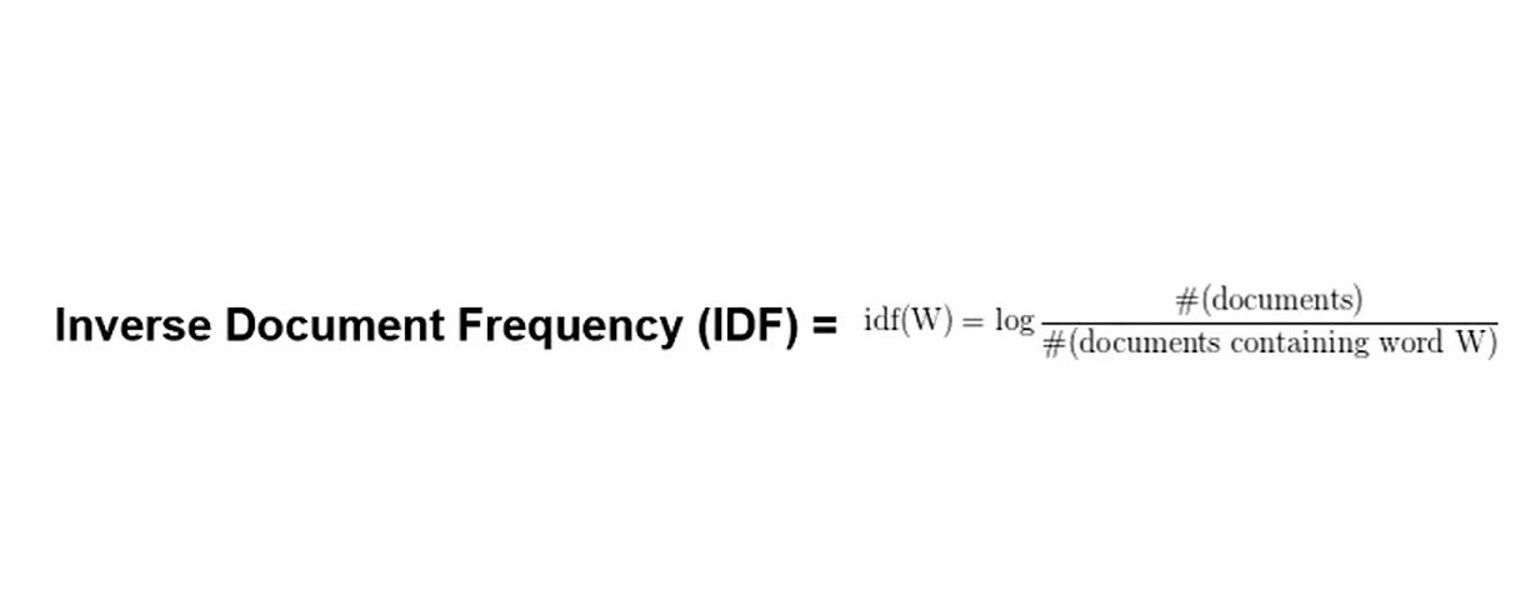

#### Example:
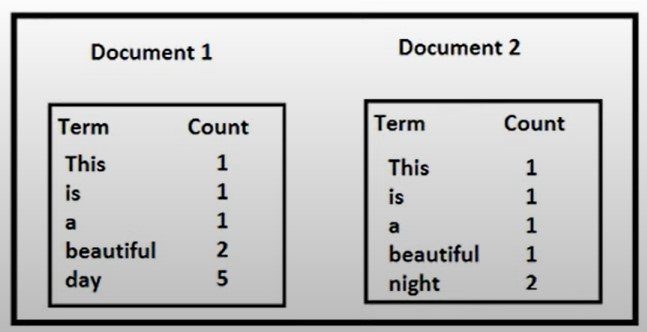


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer  #TFIDF = Term Frequency - Inverse Document Frequency
from sklearn.metrics.pairwise import cosine_similarity

# Maybe we can use pytorch and implement for this part
# can also try with Embedding like GLVOE

#### Generating Response

In [11]:
def response(user_response):
    bot_response = ''
    sentence_tokens.append(user_response)
    vector = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english') # vectorization
    Tfidf = vector.fit_transform(sentence_tokens)
    vals = cosine_similarity(Tfidf[-1], Tfidf)  # checking similarity of new vector with old vectors
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    
    req_Tfidf = flat[-2]
    if (req_Tfidf == 0):  # if no similarities
        bot_response = bot_response + "I am sorry! I do not understand"  
    else:
        bot_response = bot_response + sentence_tokens[idx]
    
    return bot_response
    

In [14]:
flag = True
print("Hello, ask me something, if you want to exit: type: B")
while(flag == True):
    user_response = input()
    user_response = user_response.lower()
    print("User:",user_response)
    if user_response != "bye":
        if user_response == 'thanks' or user_response == 'thank you':
            flag = False
            print("Bot: You are welcome.")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+ greeting(user_response))
            else:
                print("ROBO: ",end="")
                print(response(user_response))
                sentence_tokens.remove(user_response)

    else:
        flag = False
        print("Bot: Bye!")
        break
        


Hello, ask me something, if you want to exit: type: B
hello
User: hello
ROBO: hi there
how are you
User: how are you
ROBO: I am sorry! I do not understand
ok
User: ok
ROBO: I am sorry! I do not understand
tech
User: tech
ROBO: I am sorry! I do not understand
Google
User: google
ROBO: "google assistant is a mega ai bot that wants to be absoutely everywhere".
what is google?
User: what is google?
ROBO: "google assistant is a mega ai bot that wants to be absoutely everywhere".
facebook
User: facebook
ROBO: "facebook opens its messenger platform to chatbots".
Bye
User: bye
Bot: Bye!
